In [ ]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
matplotlib.rc('font', family='Malgun Gothic')

import datetime
import calendar
import matplotlib.gridspec as gridspec

채영 - 
카테고리/ 분류한 그룹

카테고리/ 분류한 그룹 + 쿠폰이 있는것과 없는것

두개 합쳐서 비교 

일반(그룹)에서 쿠폰을 썼냐 안썻냐 두 경우 모두 어떤 강의가 가장 인기가 많았는지.

In [ ]:
%%time

df = pd.read_csv('final_score.csv')

CPU times: total: 812 ms
Wall time: 829 ms


In [ ]:
def con(x):
    if x:
        return 1-2
    else: 
        return 0-2

df['coupon_use'] = ~df['coupon_title'].isna().map(con)

In [ ]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,sale_price,pg,method,subcategory_title,marketing_start_at,trans_level,purchase_level,total_score,group,coupon_use
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171.81,...,190.9,default,CARD,NaN,2021-03-04 00:00:00,1,3,4,이탈위험,1
1,1004099,72297.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-11 15:18:35,113.00,...,113.0,INICIS,CARD,프론트엔드 개발,2021-02-02 00:00:00,1,3,4,이탈위험,0
2,1181420,72297.0,205162.0,PAYMENT,COMPLETED,올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리...,영상/3D,올인원,2021-06-30 20:24:24,98.00,...,98.0,PAYCO,CARD,영상 편집,2021-06-03 00:00:00,1,3,4,이탈위험,0
3,1181456,72297.0,204373.0,PAYMENT,COMPLETED,초격차 패키지 : 일잘러 필수 스킬 모음.zip,업무 생산성,올인원,2021-06-30 20:29:12,109.00,...,109.0,PAYCO,CARD,PPT/보고서,2021-06-04 00:00:00,1,3,4,이탈위험,0
4,1285179,72297.0,202789.0,PAYMENT,COMPLETED,올인원 패키지 : 2021 취업/이직/투자를 위한 기업분석,투자/재테크,올인원,2021-08-13 21:30:43,21.50,...,124.5,PAYCO,CARD,주식 투자,2020-09-11 00:00:00,1,3,4,이탈위험,1


In [ ]:
# group 별 category_title이 어떤지 확인하기
pd.crosstab(df['category_title'], df['group']).style.background_gradient(cmap='summer_r')

group,VIP,이탈,이탈위험,일반
category_title,,,,
데이터사이언스,13,5595,1102,61
디자인,9,5147,454,28
마케팅,19,4240,371,17
부동산/금융,10,2465,297,12
비즈니스,0,21,0,0
업무 생산성,18,5898,613,27
영상/3D,10,4681,387,26
지식콘텐츠,1,16,4,1
크리에이티브,1,767,57,1


In [ ]:
# 쿠폰 사용한 사람들 중 (coupon_use==1) group 별 category_title이 어떤지 확인하기
pd.crosstab(df[df['coupon_use']==1]['category_title'], df[df['coupon_use']==1]['group']).style.background_gradient(cmap='summer_r')

group,VIP,이탈,이탈위험,일반
category_title,,,,
데이터사이언스,8,2440,499,21
디자인,7,2968,271,12
마케팅,11,1437,184,12
부동산/금융,6,1038,158,4
비즈니스,0,3,0,0
업무 생산성,10,2433,225,7
영상/3D,7,2647,235,14
크리에이티브,0,186,11,1
투자/재테크,3,750,90,6


In [ ]:
# 쿠폰 사용하지 않은 사람들 중 (coupon_use==0) group 별 category_title이 어떤지 확인하기
pd.crosstab(df[df['coupon_use']==0]['category_title'], df[df['coupon_use']==0]['group']).style.background_gradient(cmap='summer_r')

group,VIP,이탈,이탈위험,일반
category_title,,,,
데이터사이언스,5,3155,603,40
디자인,2,2179,183,16
마케팅,8,2803,187,5
부동산/금융,4,1427,139,8
비즈니스,0,18,0,0
업무 생산성,8,3465,388,20
영상/3D,3,2034,152,12
지식콘텐츠,1,16,4,1
크리에이티브,1,581,46,0


# 그룹, 카테고리 별 쿠폰 사용 
현재의 상황은 이탈이 압도적으로 많은 비율을 차지하고 이탈위험은 조금 존재하고 VIP와 일반은 거의 존재하지 않는다.<br>
카테고리(category_title), 그룹(group), coupon_use
- 수로 세기
- 비율로 세기

1. 각 그룹 별 카테고리의 쿠폰 사용 그래프 따로 하나씩
2. 각 카테고리 별 쿠폰 사용 합쳐서
3. 각 그룹 별 쿠폰 사용 합쳐서


In [ ]:
pd.set_option('display.max_rows', 80)

In [ ]:
df_couponuse = pd.DataFrame(df.value_counts(subset=['group','category_title', 'coupon_use']))
df_couponuse.index.names = ['group','category_title','coupon_use']
df_couponuse.head(78)

0
group category_title coupon_use      
이탈    프로그래밍          0           7997
                     1           6513
      업무 생산성         0           3465
      데이터사이언스        0           3155
      디자인            1           2968
      마케팅            0           2803
      영상/3D          1           2647
      데이터사이언스        1           2440
      업무 생산성         1           2433
      디자인            0           2179
      영상/3D          0           2034
      마케팅            1           1437
      부동산/금융         0           1427
이탈위험  프로그래밍          0           1174
이탈    부동산/금융         1           1038
이탈위험  프로그래밍          1            890
이탈    투자/재테크         1            750
이탈위험  데이터사이언스        0            603
이탈    크리에이티브         0            581
      투자/재테크         0            520
이탈위험  데이터사이언스        1            499
      업무 생산성         0            388
      디자인            1            271
      영상/3D          1            235
      업무 생산성         1            225
      마케팅            0            187
이탈    크리에이티브         1            186
이탈위험  마케팅            1            184
      디자인            0            183
      부동산/금융         1            158
      영상/3D          0            152
      부동산/금융         0            139
      투자/재테크         1             90
                     0             84
일반    프로그래밍          0             81
이탈위험  크리에이티브         0             46
일반    데이터사이언스        0             40
      프로그래밍          1             25
      데이터사이언스        1             21
VIP   프로그래밍          0             20
일반    업무 생산성         0             20
이탈    비즈니스           0             18
VIP   프로그래밍          1             18
이탈    지식콘텐츠          0             16
일반    디자인            0             16
이탈    파이낸스           0             14
일반    영상/3D          1             14
                     0             12
      마케팅            1             12
      디자인            1             12
이탈위험  크리에이티브         1             11
VIP   마케팅            1             11
      업무 생산성         1             10
      데이터사이언스        1              8
      마케팅            0              8
      업무 생산성         0              8
일반    부동산/금융         0              8
VIP   디자인            1              7
일반    업무 생산성         1              7
VIP   영상/3D          1              7
      부동산/금융         1              6
일반    투자/재테크         1              6
                     0              6
VIP   데이터사이언스        0              5
일반    마케팅            0              5
      부동산/금융         1              4
VIP   투자/재테크         0              4
이탈위험  지식콘텐츠          0              4
VIP   부동산/금융         0              4
      영상/3D          0              3
      투자/재테크         1              3
이탈    비즈니스           1              3
이탈위험  파이낸스           0              2
VIP   디자인            0              2
      지식콘텐츠          0              1
일반    지식콘텐츠          0              1
      크리에이티브         1              1
VIP   크리에이티브         0              1

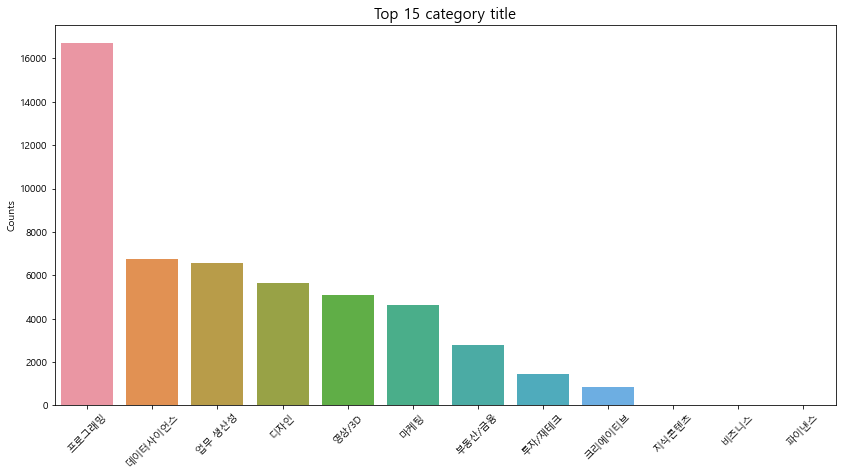

In [ ]:
# 결제가 많이 이루어진 순으로 대분류 그래프 그리기 (Top15)
plt.figure(figsize=(14, 7))
sns.barplot(x=df.category_title.value_counts().head(15).index, y=df.category_title.value_counts().head(15))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 15 category title', fontsize=15,color='black')
plt.show()

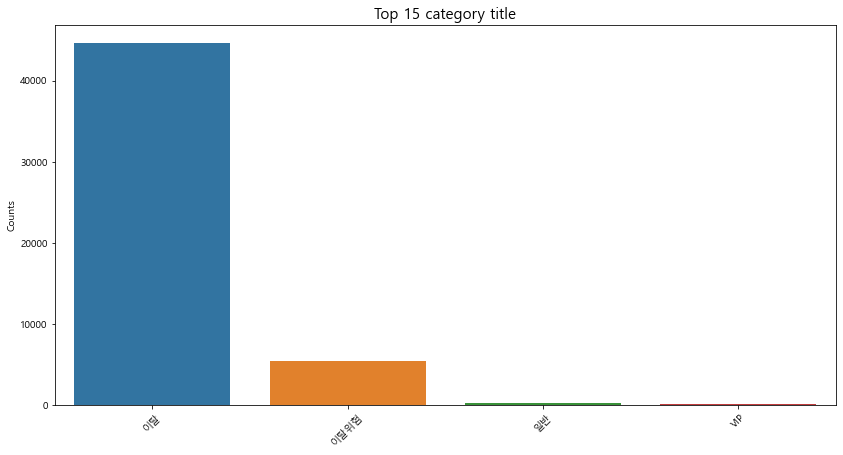

In [ ]:
# 전체에서 차지하는 group의 비율
# 결제가 많이 이루어진 순으로 대분류 그래프 그리기 (Top15)
plt.figure(figsize=(14, 7))
sns.barplot(x=df.group.value_counts().head(15).index, y=df.group.value_counts().head(15))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 15 category title', fontsize=15,color='black')
plt.show()

In [ ]:
groupcount = pd.DataFrame(df.value_counts(subset='group'))
groupcount

,0
group,
이탈,44624
이탈위험,5525
일반,291
VIP,126


Text(0.5, 1.0, '이탈')

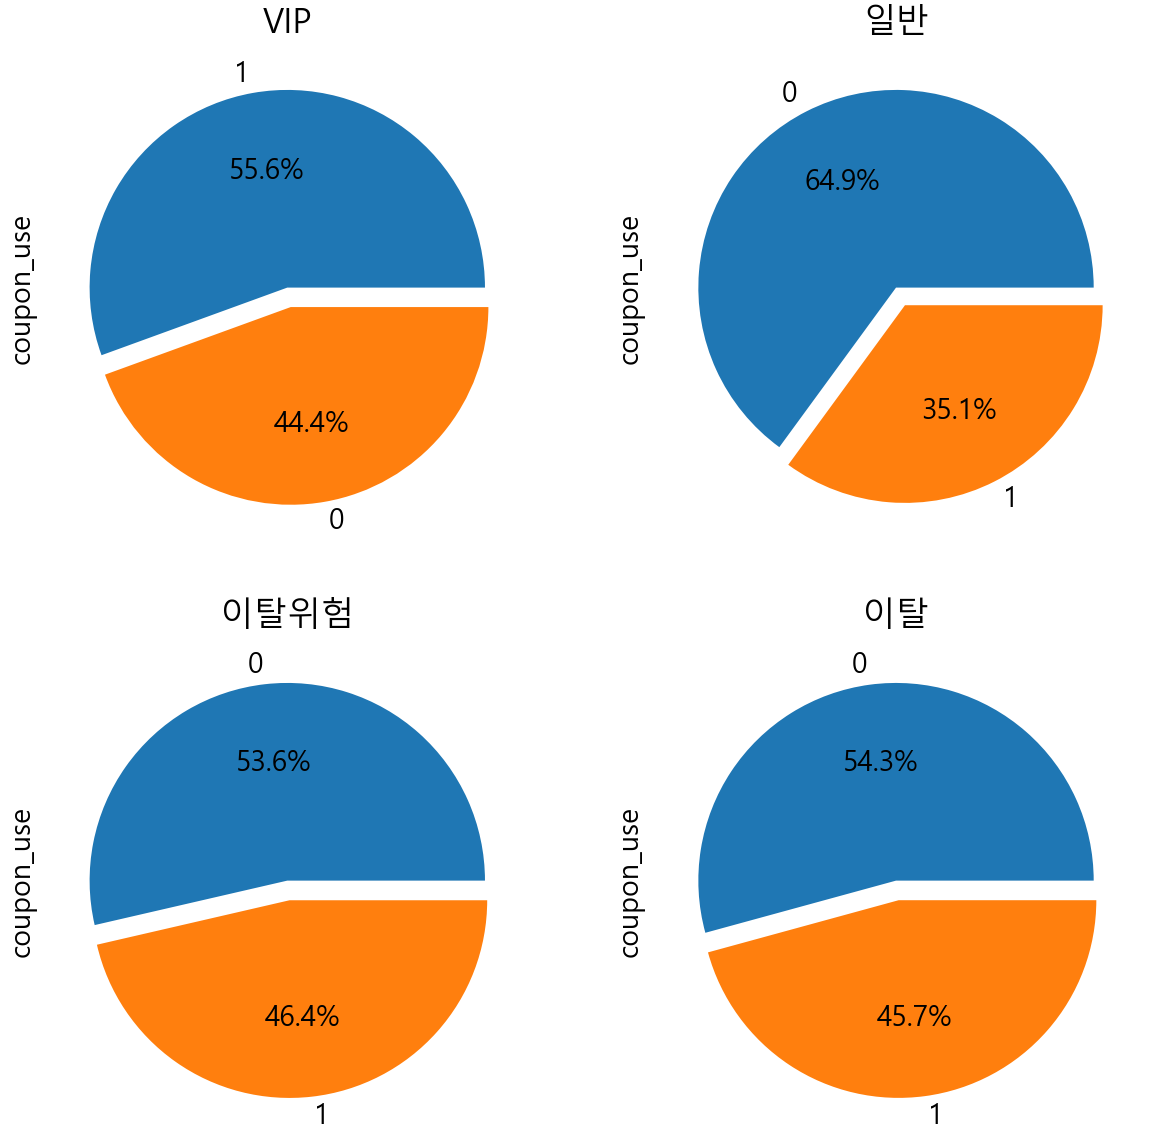

In [ ]:
# 그룹별 쿠폰 사용 비율
fig, axes = plt.subplots(2,2, figsize=(20,20))
plt.rc('font', size=28)
df['coupon_use'][df['group']=='VIP'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[0,0])
df['coupon_use'][df['group']=='일반'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[0,1])
df['coupon_use'][df['group']=='이탈위험'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[1,0])
df['coupon_use'][df['group']=='이탈'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[1,1])

axes[0,0].set_title('VIP')
axes[0,1].set_title('일반')
axes[1,0].set_title('이탈위험')
axes[1,1].set_title('이탈')


네 등급 중에서 유일하게 VIP 등급만이 쿠폰 사용이 과반수라는 것을 확인할 수 있었다.

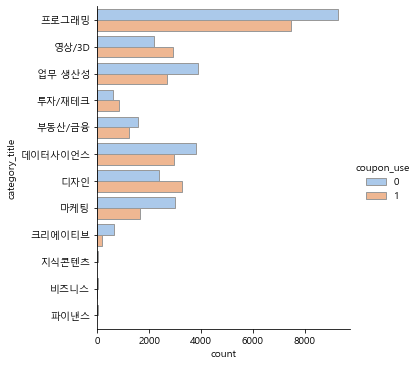

In [ ]:
# 카테고리 별 쿠폰 사용 수 살펴보기
sns.catplot(y="category_title", hue="coupon_use", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

- 전체에서 보았을 때, 주로 쿠폰을 사용하지 않고 사는 카테고리는 프로그래밍, 업무 생산성, 데이터사이언스, 마케팅
- 주로 쿠폰을 사용하는 카테고리는 영상/3D, 투자/재태크, 디자인

Text(0.5, 1.0, '이탈')

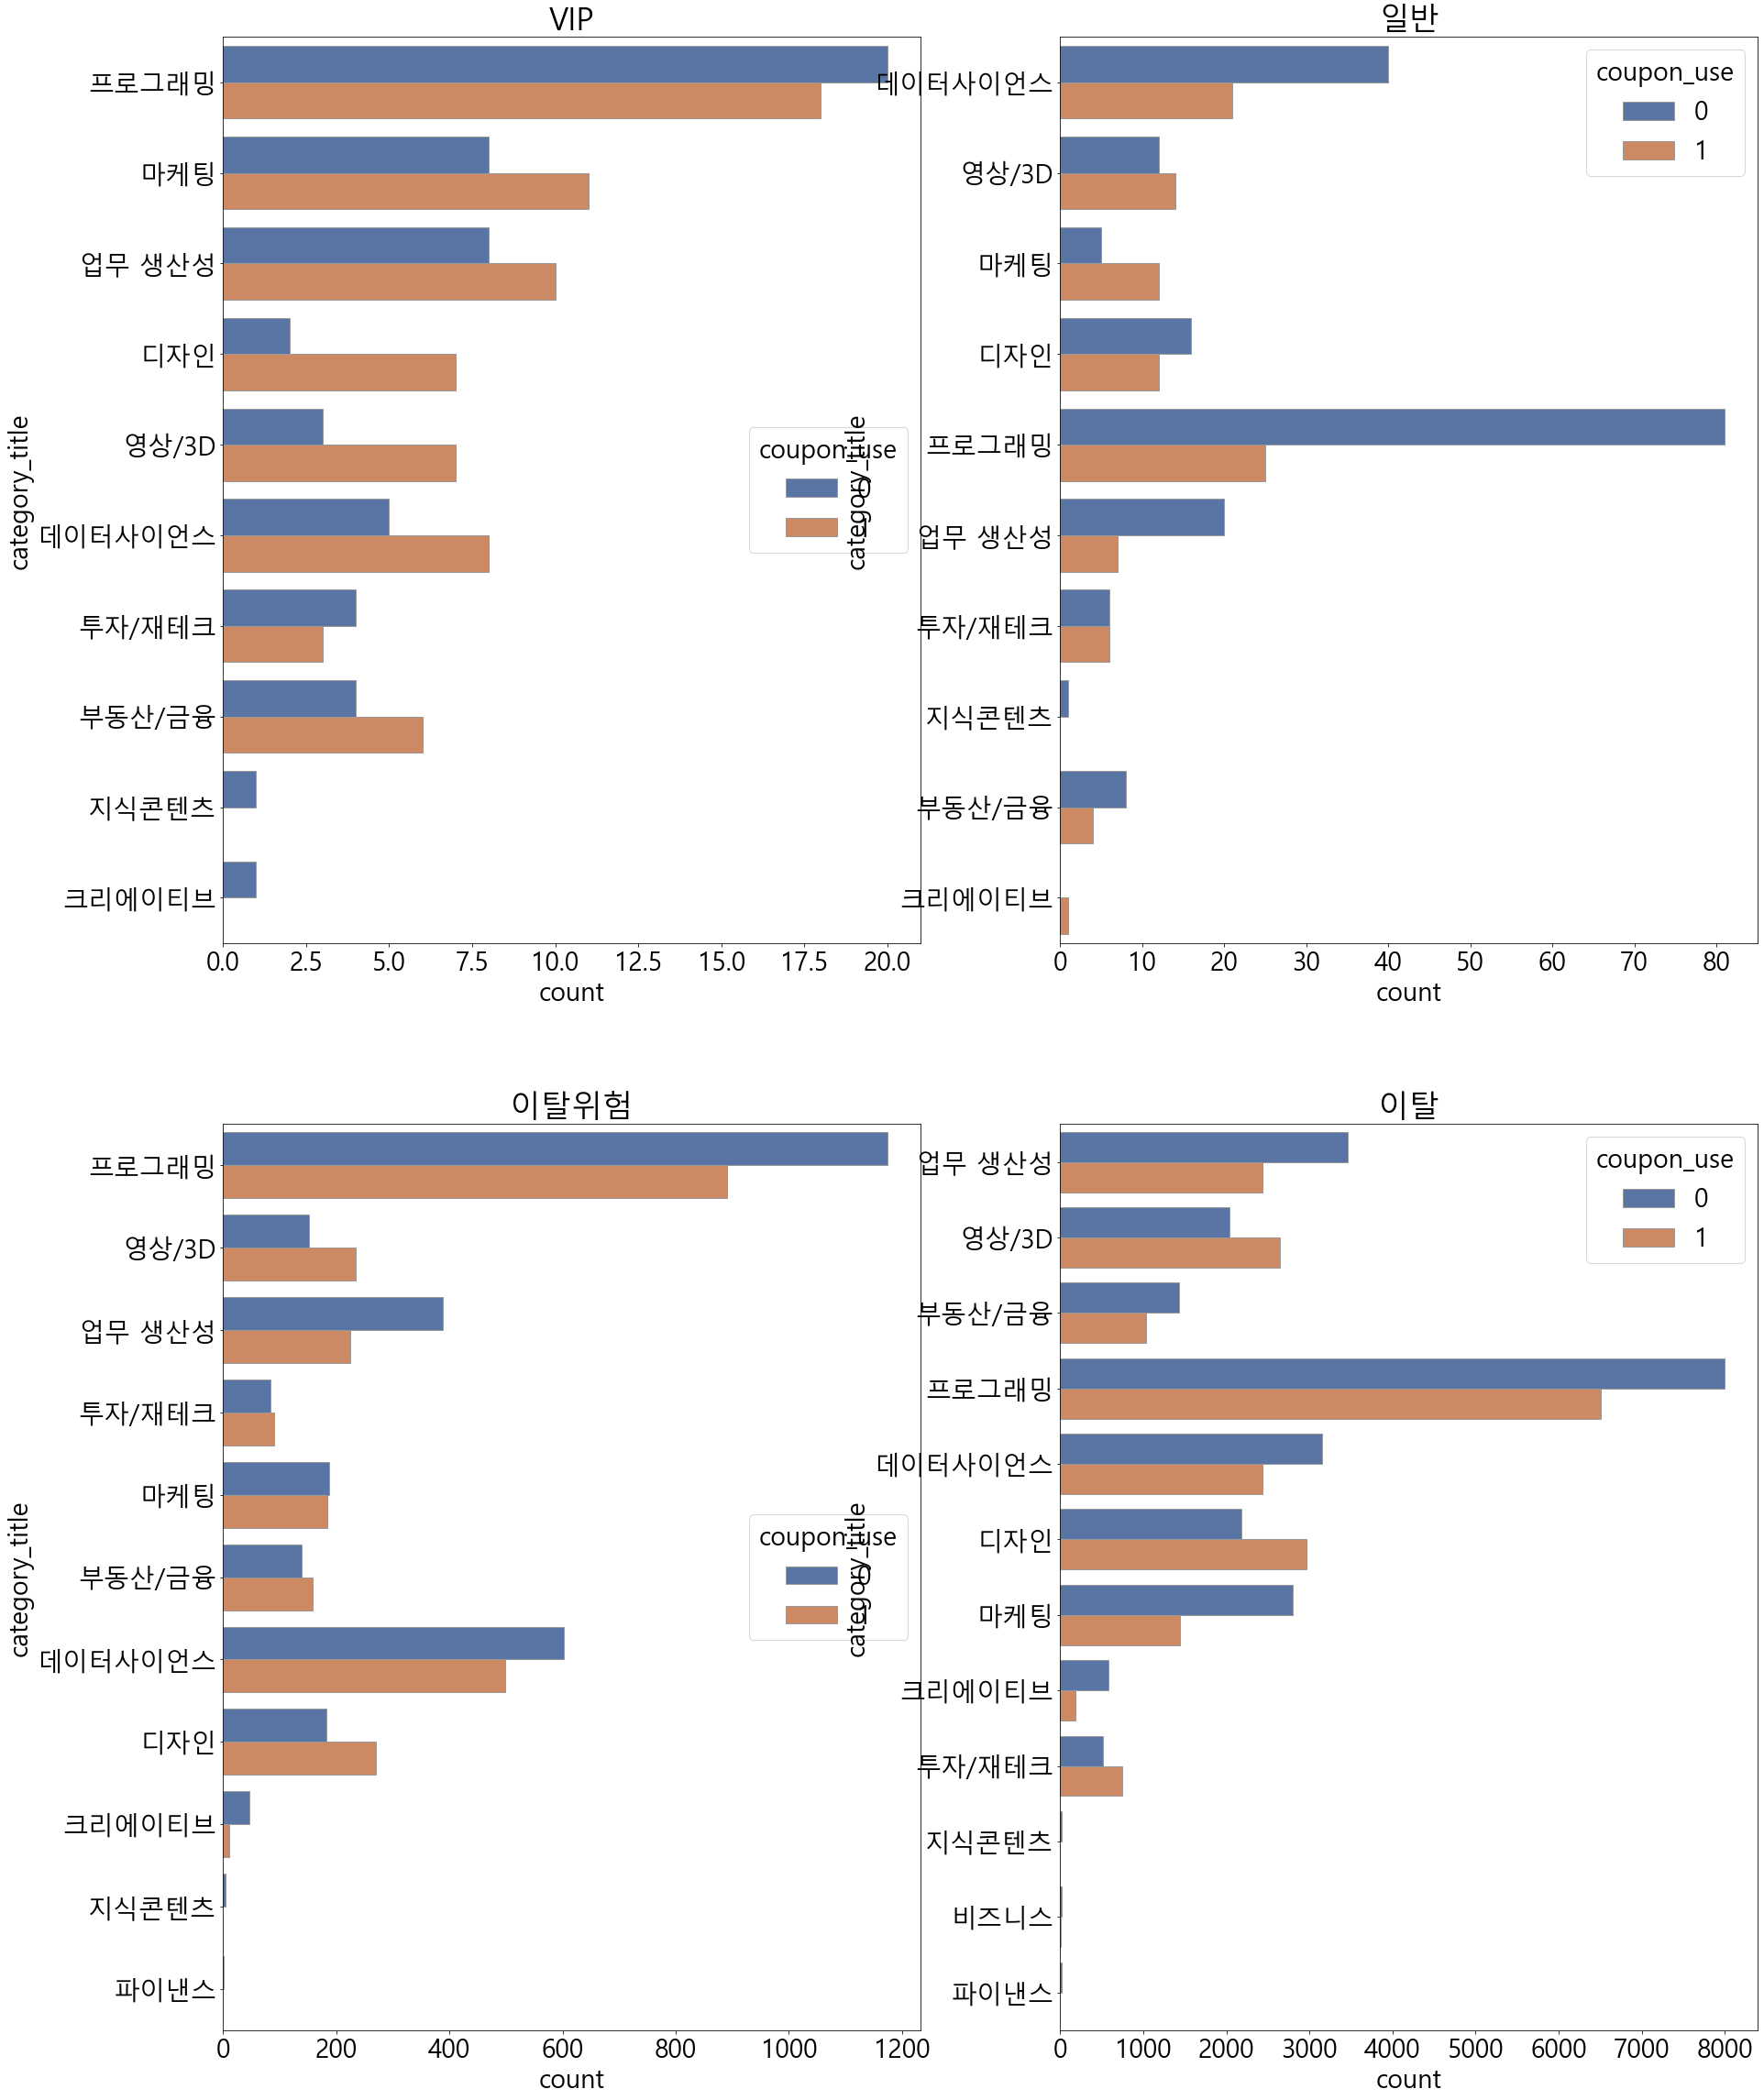

In [ ]:
# group 별 카테고리 별 쿠폰 사용 수 살펴보기
fig, axes = plt.subplots(2, 2, figsize=(30,40))

sns.countplot(y="category_title", hue="coupon_use",
            palette="deep", edgecolor=".6",
            data=df[df['group']=='VIP'], ax=axes[0,0])
sns.countplot(y="category_title", hue="coupon_use",
            palette="deep", edgecolor=".6",
            data=df[df['group']=='일반'], ax=axes[0,1])
sns.countplot(y="category_title", hue="coupon_use",
            palette="deep", edgecolor=".6",
            data=df[df['group']=='이탈위험'], ax=axes[1,0])
sns.countplot(y="category_title", hue="coupon_use",
            palette="deep", edgecolor=".6",
            data=df[df['group']=='이탈'], ax=axes[1,1])

axes[0,0].set_title('VIP')
axes[0,1].set_title('일반')
axes[1,0].set_title('이탈위험')
axes[1,1].set_title('이탈')


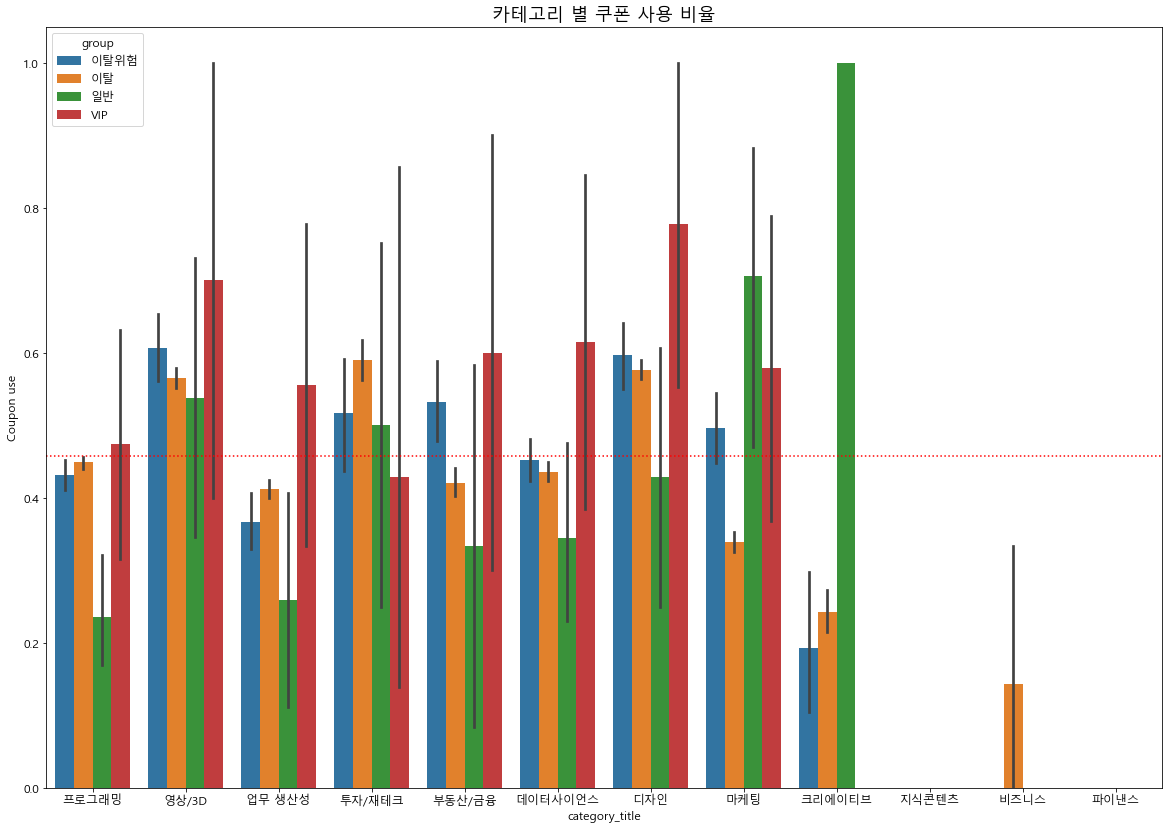

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 14))
plt.rc('font', size=12)
sns.barplot(x='category_title', y='coupon_use',hue='group', data=df)
axes.axhline(y=df['coupon_use'].mean(), color='red', linestyle='dotted', 
           label = f"{df['coupon_use'].mean()}")
plt.ylabel('Coupon use')
plt.title('카테고리 별 쿠폰 사용 비율', fontsize=18,color='black')
plt.show()

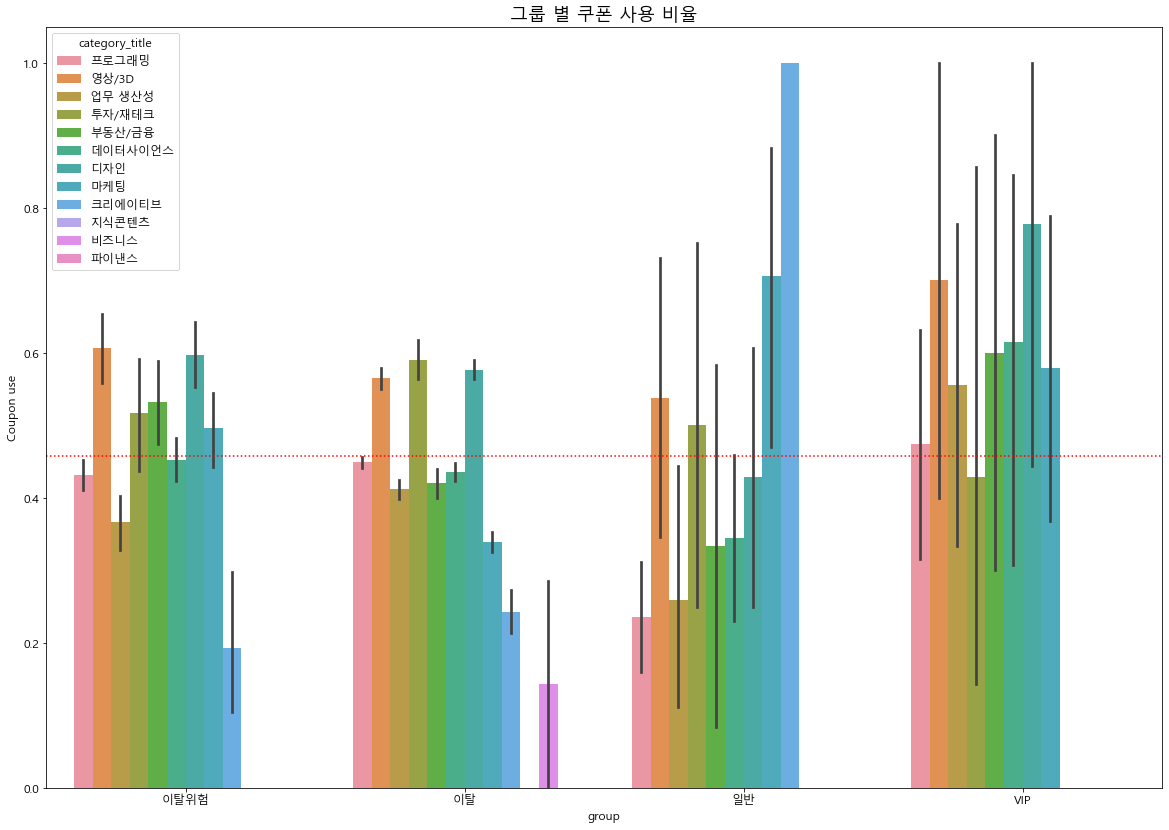

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 14))
plt.rc('font', size=12)
sns.barplot(x='group', y='coupon_use',hue='category_title', data=df)
axes.axhline(y=df['coupon_use'].mean(), color='red', linestyle='dotted', 
           label = f"{df['coupon_use'].mean()}")
plt.ylabel('Coupon use')
plt.title('그룹 별 쿠폰 사용 비율', fontsize=18,color='black')
plt.show()

# 쿠폰을 쓴 경우 가장 인기가 많았던 강의, 쿠폰을 쓰지 않은 경우 가장 인기가 많았던 강의
- 전체에서 가장 인기있는 강의
- 쿠폰을 사용하여 결제한 강의
- 쿠폰을 사용하지 않고 결제한 강의
- 등급별 많이 결제한 강의


## 전체에서 인기있는 강의

In [ ]:
# 전체에서 가장 인기있는 강의 12개
df['course_title'].value_counts().head(12)

초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                           1416
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                                1408
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                                           1210
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                                1053
네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트                                          874
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                                     819
나의 칼퇴치트키 엑셀유치원                                                         787
올인원 패키지 : star741의 캐주얼 일러스트 드로잉                                        684
초격차 패키지 : 한번에 끝내는 디자인 툴                                                670
초격차 패키지 : 한 번에 끝내는 엑셀 실무                                               656
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential     644
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin                       617
Name: course_title, dtype: int64

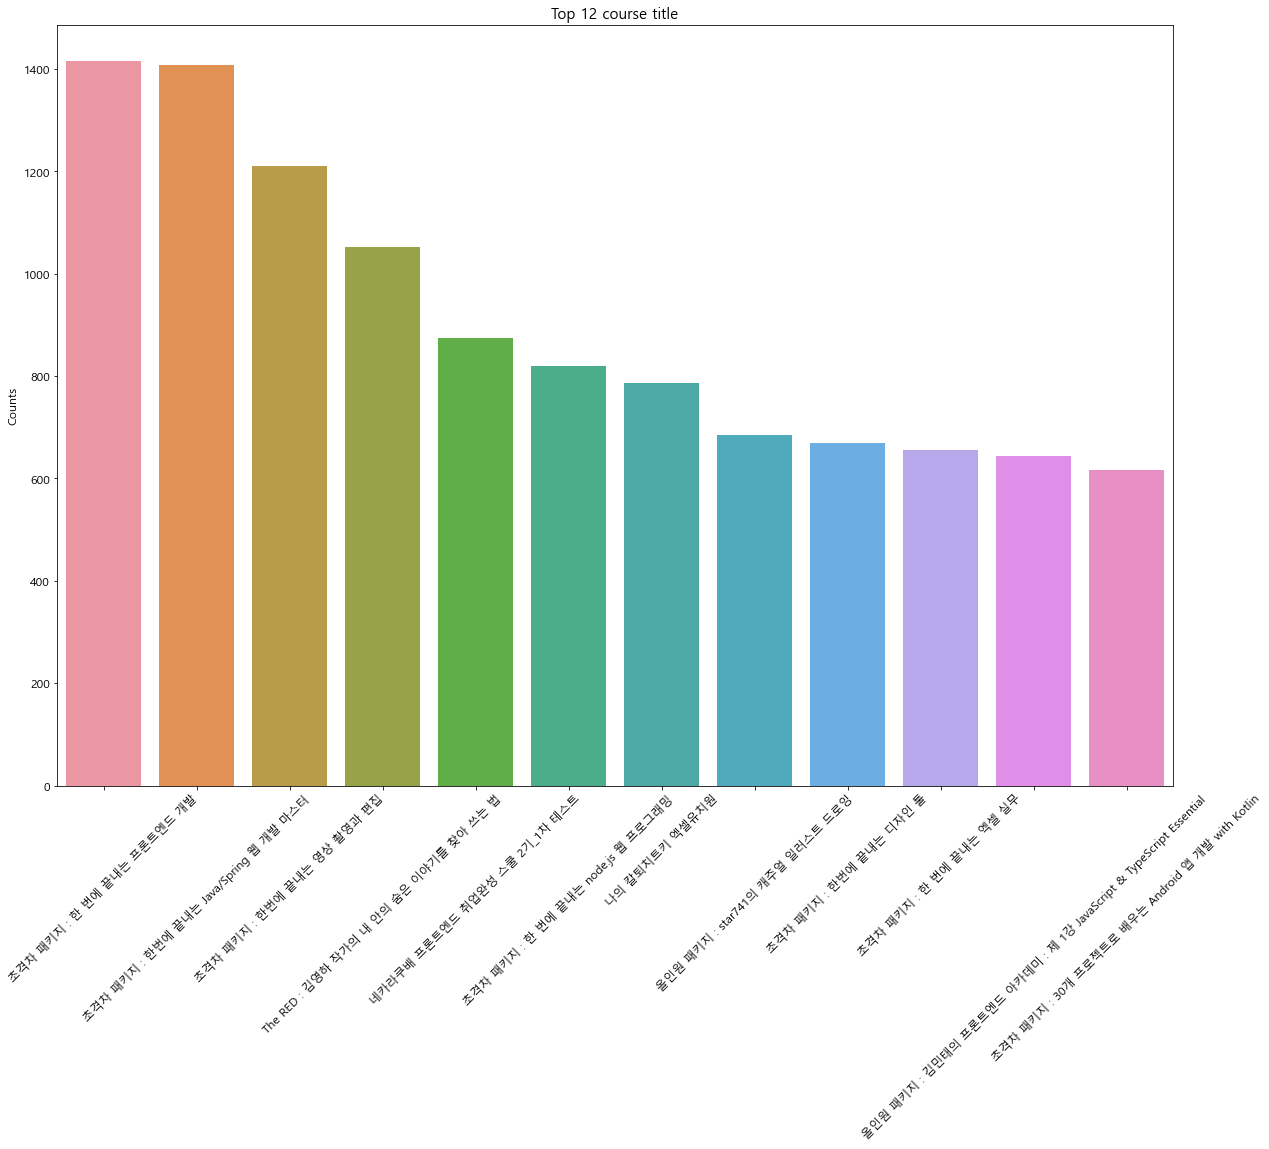

In [ ]:
# 결제가 많이 이루어진 순으로 강의 그래프 그리기(Top12)

plt.figure(figsize=(20, 14))
plt.rc('font', size=12)
sns.barplot(x=df.course_title.value_counts().head(12).index, y=df.course_title.value_counts().head(12))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 12 course title', fontsize=15,color='black')
plt.show()

Q. x축에 12개만 들어가게 할 수 있는 방법이 없을까??? 
- 가장 많이 팔린 12개 강의들의 쿠폰 사용율
- 쿠폰 사용율이 높은 강의 12개
을 보고 싶음

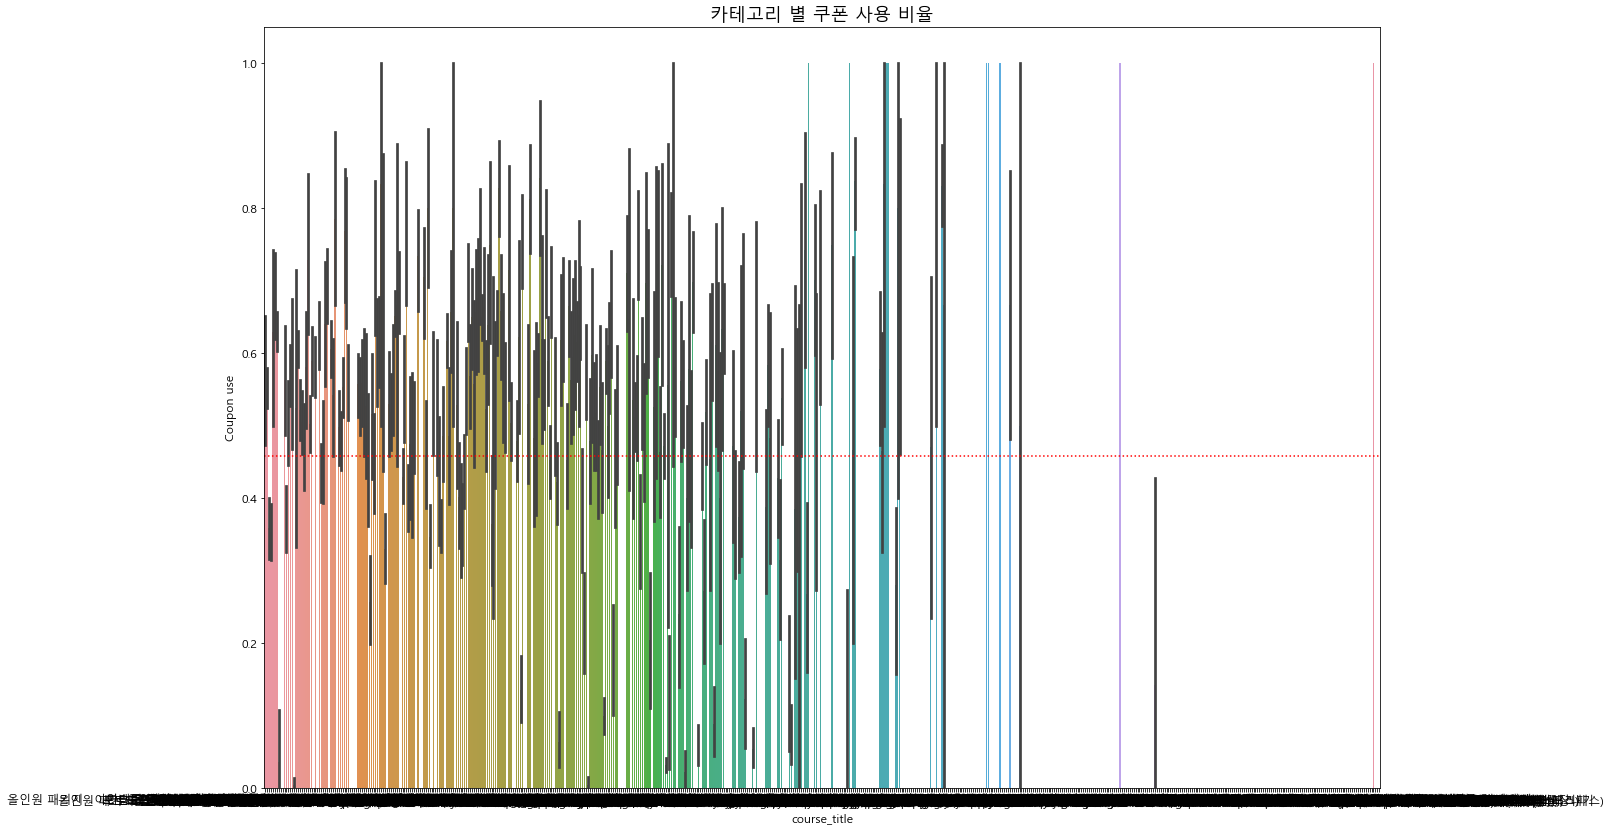

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 14))
plt.rc('font', size=12)
sns.barplot(x='course_title', y='coupon_use', data=df)
axes.axhline(y=df['coupon_use'].mean(), color='red', linestyle='dotted', 
           label = f"{df['coupon_use'].mean()}")
plt.ylabel('Coupon use')
plt.title('강의 별 쿠폰 사용 비율', fontsize=18,color='black')
plt.show()

## 쿠폰을 사용하여 결제한 강의

In [ ]:
# 쿠폰을 사용하여 결제를 많이 한 강의
coupon_used = pd.DataFrame(df[df['coupon_use']==1]['course_title'].value_counts().head(12))
coupon_used

,course_title
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,853
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,780
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,762
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,534
나의 칼퇴치트키 엑셀유치원,512
초격차 패키지 : 한번에 끝내는 디자인 툴,413
초격차 패키지 : 한 번에 끝내는 엑셀 실무,381
초격차 패키지 : 한번에 끝내는 UX/UI 디자인,373
올인원 패키지 : 완전정복 시각디자인 기초,335
초격차 패키지 : 한번에 끝내는 모션그래픽,327


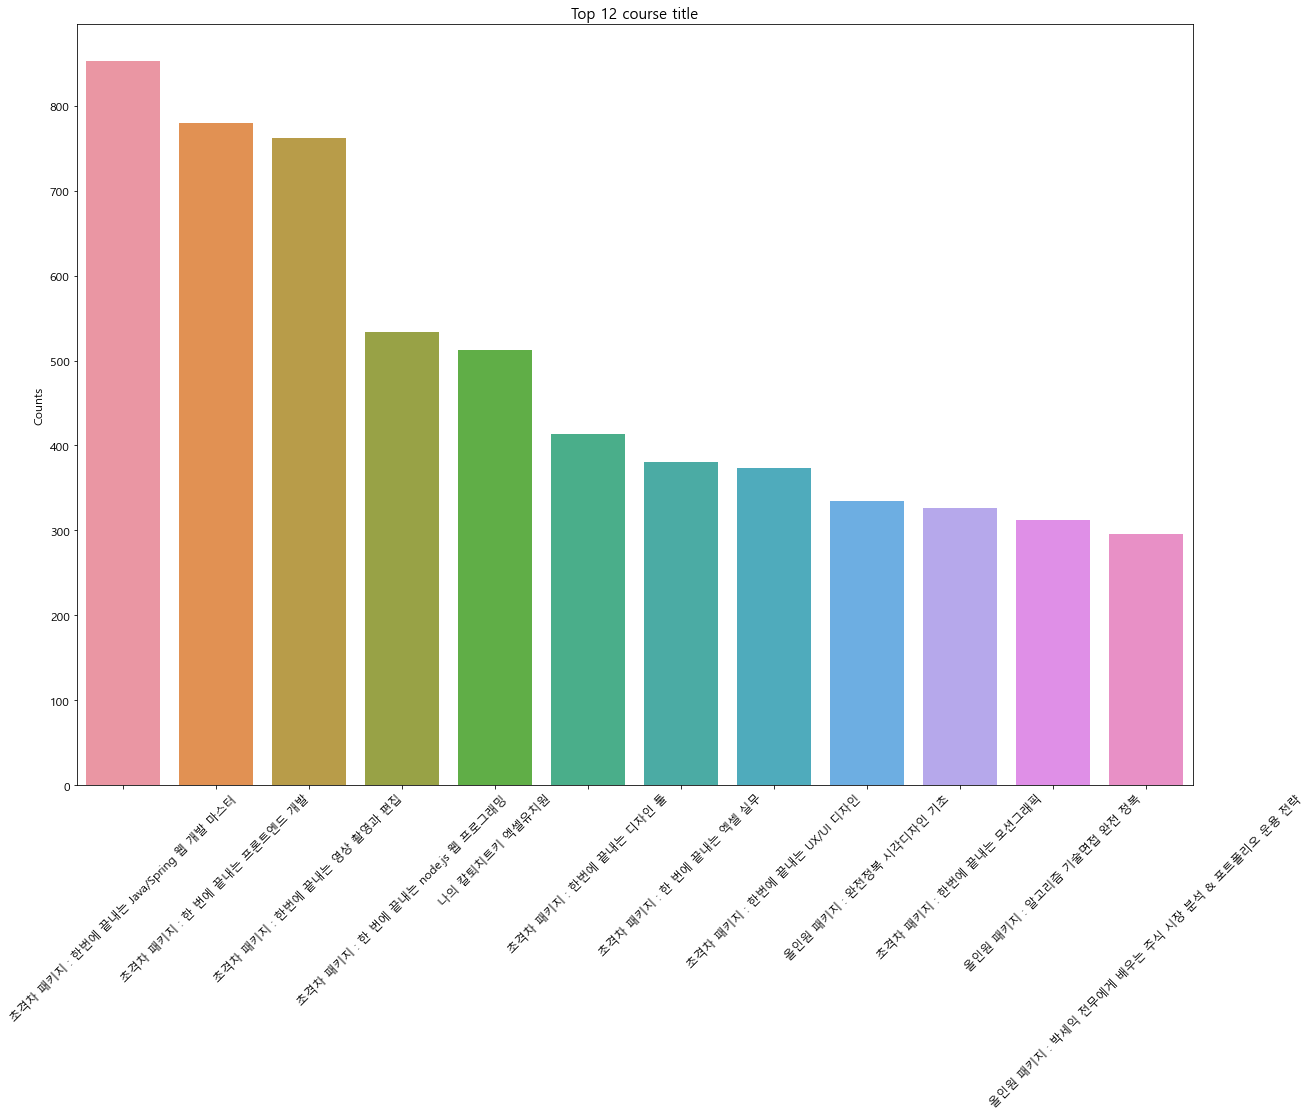

In [ ]:
# 쿠폰을 사용하여 결제가 많이 이루어진 순으로 강의 그래프 그리기(Top12)

plt.figure(figsize=(20, 14))
plt.rc('font', size=12)
sns.barplot(x=df[df['coupon_use']==1].course_title.value_counts().head(12).index, y=df[df['coupon_use']==1].course_title.value_counts().head(12))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 12 course title', fontsize=15,color='black')
plt.show()

## 쿠폰을 사용하지 않고 결제한 강의

In [ ]:
# 쿠폰을 사용하지 않고 결제를 많이 한 강의
coupon_not_used = pd.DataFrame(df[df['coupon_use']==0]['course_title'].value_counts().head(12))
coupon_not_used

,course_title
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,1020
네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,874
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,636
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,555
입만 열면 인정받는 스피치 10분컷,479
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,448
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential,410
초격차 패키지 : 일잘러 필수 스킬 모음.zip,396
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,390
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin,349


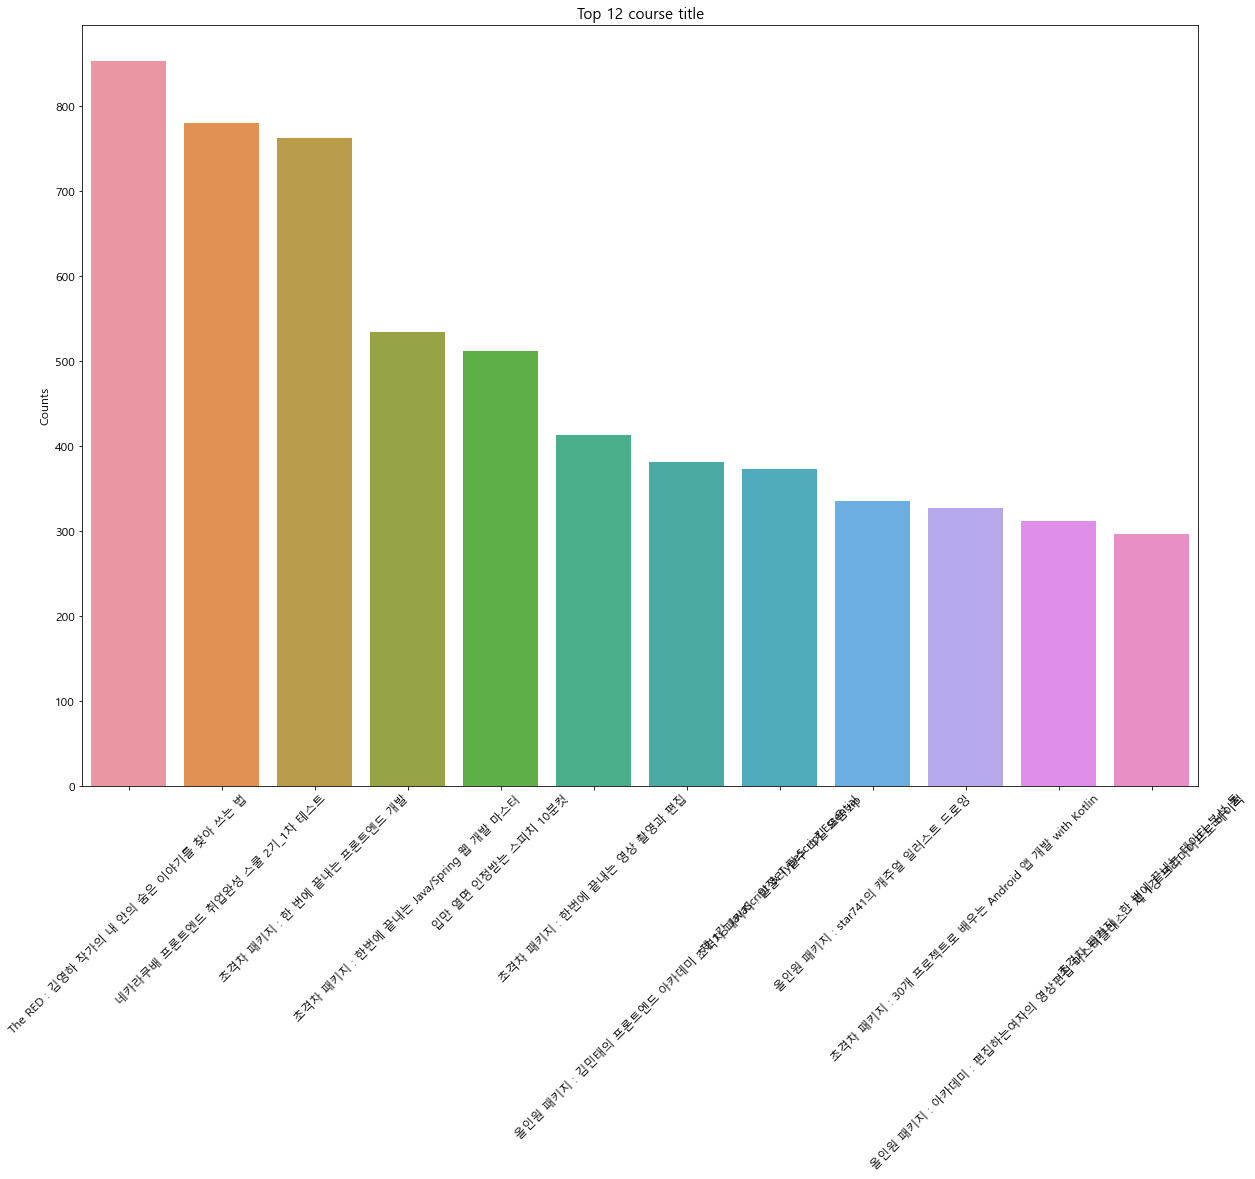

In [ ]:
# 쿠폰을 사용하여 결제가 많이 이루어진 순으로 강의 그래프 그리기(Top12)

plt.figure(figsize=(20, 14))
plt.rc('font', size=12)
sns.barplot(x=df[df['coupon_use']==0].course_title.value_counts().head(12).index, y=df[df['coupon_use']==1].course_title.value_counts().head(12))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 12 course title', fontsize=15,color='black')
plt.show()

## 등급별 

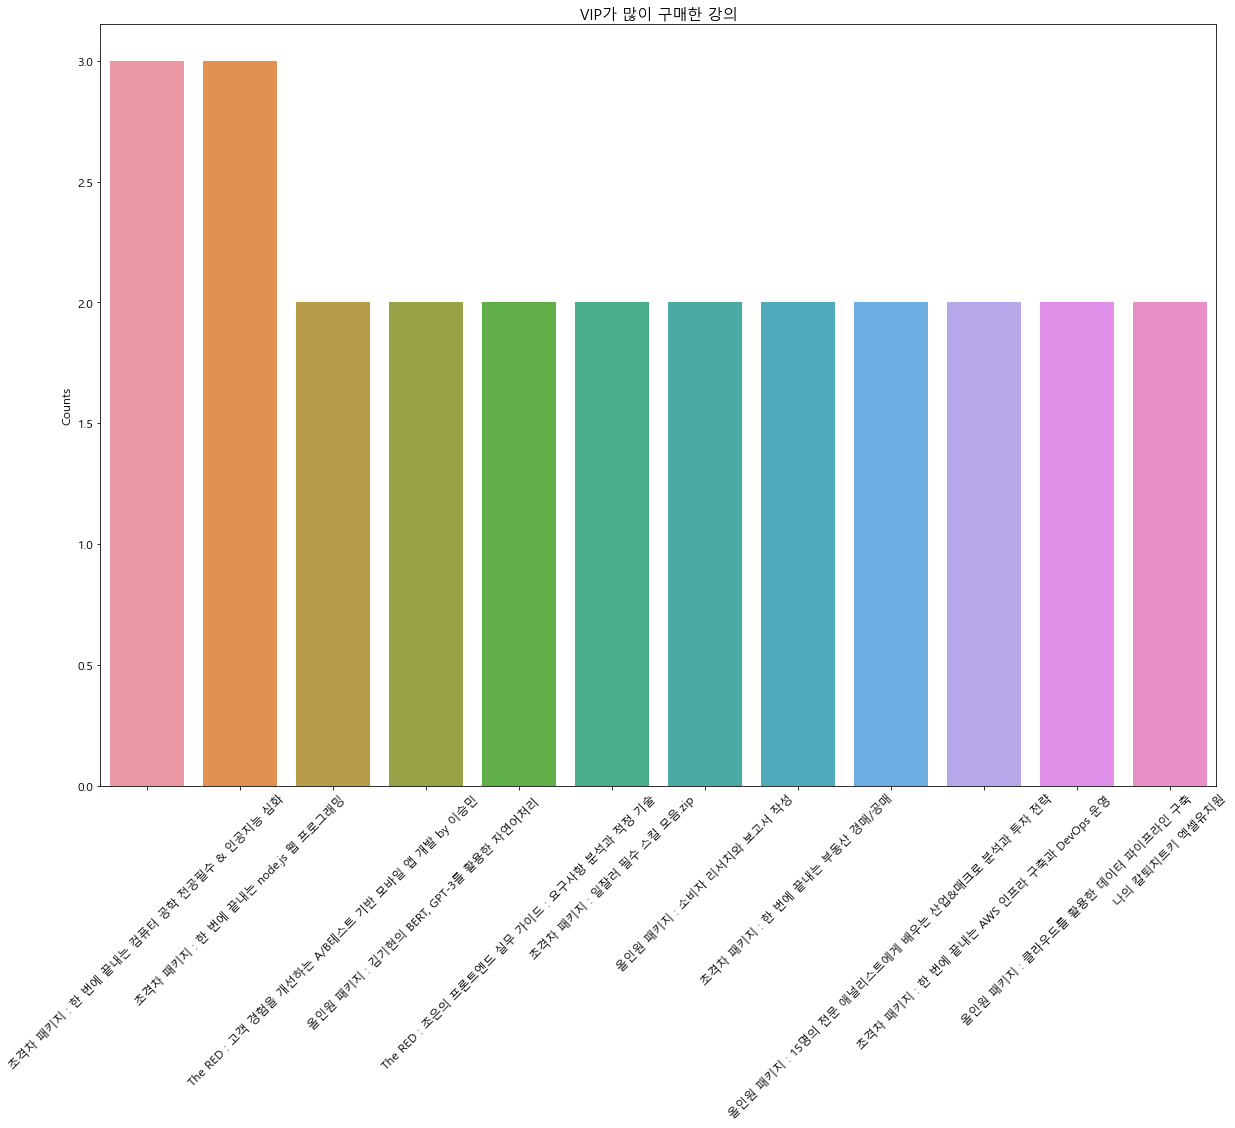

In [ ]:
plt.figure(figsize=(20, 14))
plt.rc('font', size=12)
sns.barplot(x=df[df['group']=='VIP'].course_title.value_counts().head(12).index, y=df[df['group']=='VIP'].course_title.value_counts().head(12))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('VIP가 많이 구매한 강의', fontsize=15,color='black')
plt.show()

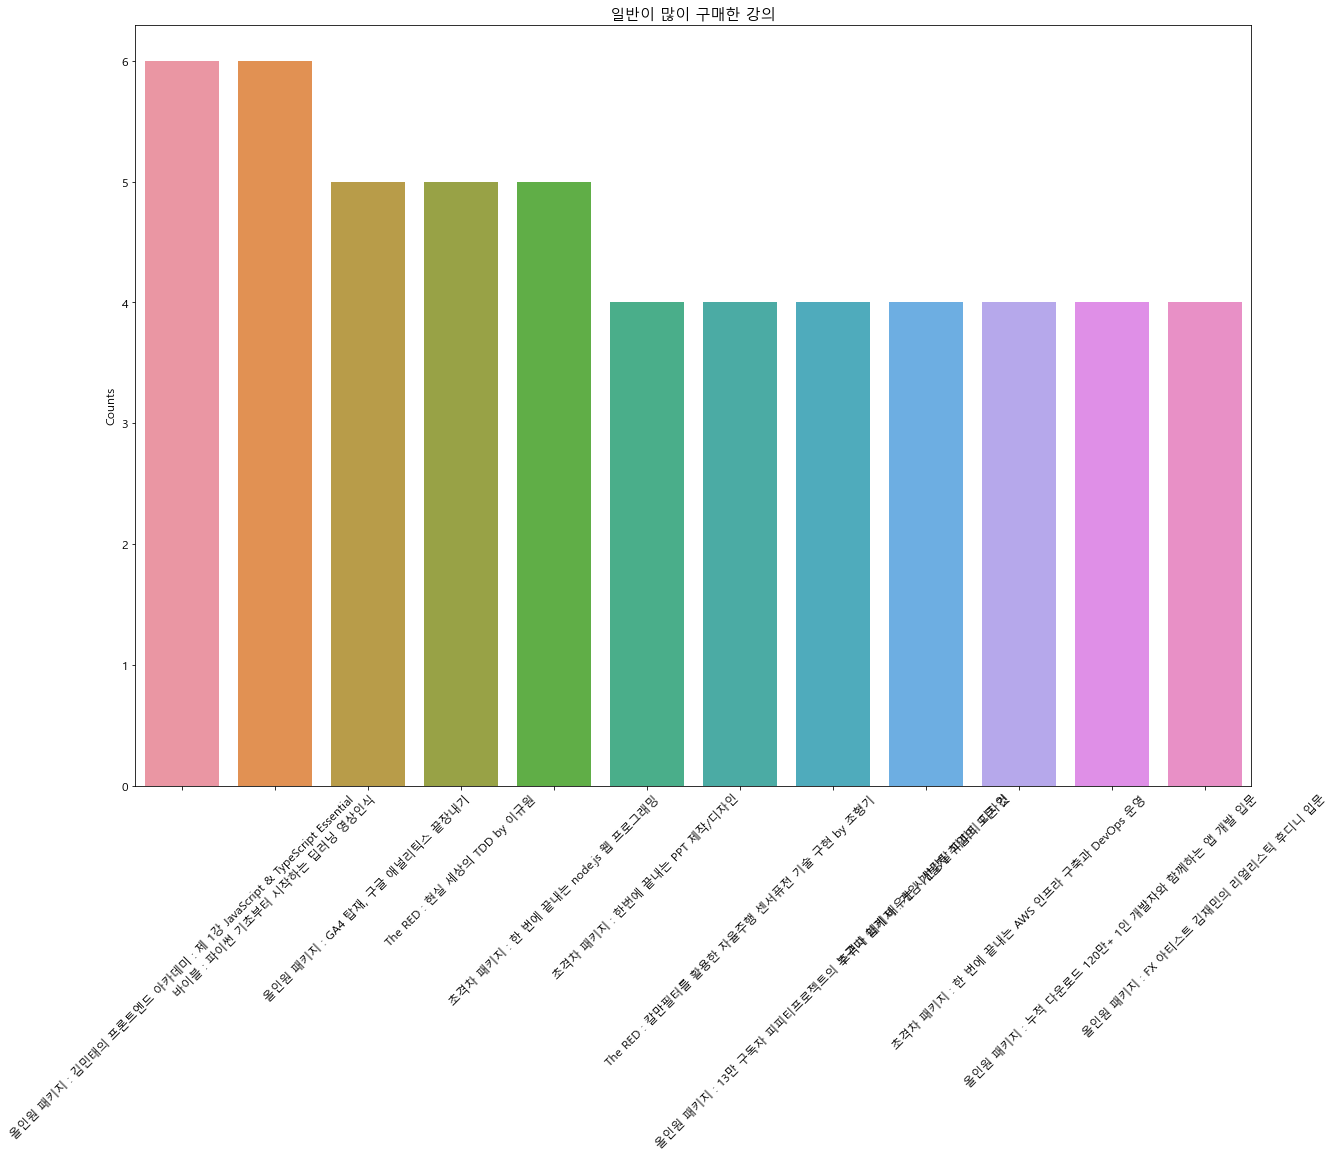

In [ ]:
plt.figure(figsize=(20, 14))
plt.rc('font', size=12)
sns.barplot(x=df[df['group']=='일반'].course_title.value_counts().head(12).index, y=df[df['group']=='일반'].course_title.value_counts().head(12))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('일반이 많이 구매한 강의', fontsize=15,color='black')
plt.show()

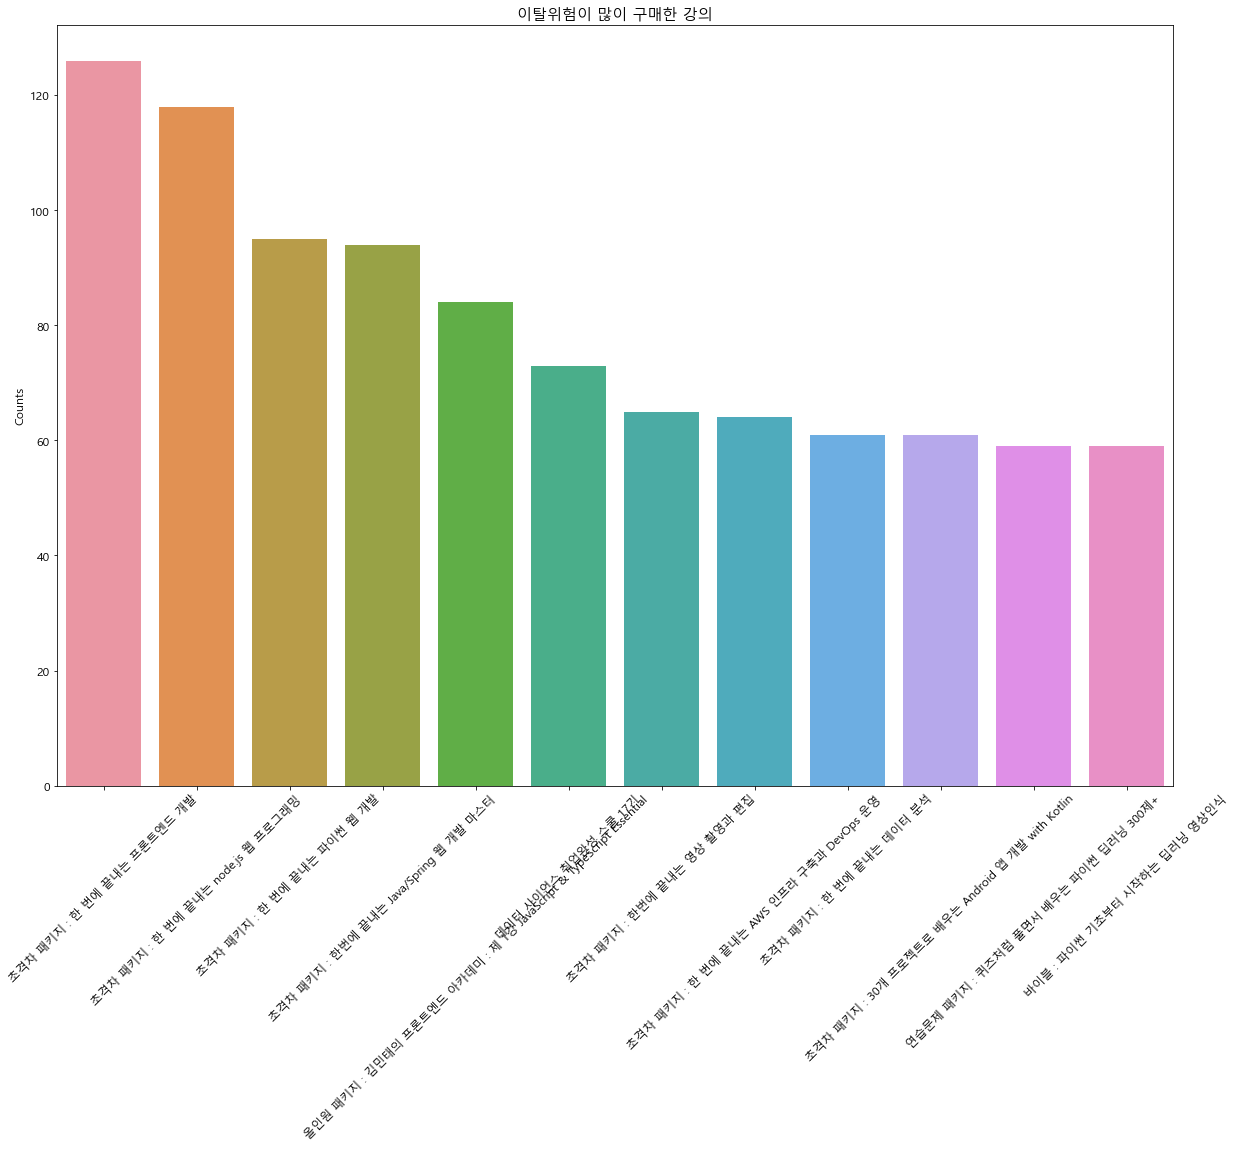

In [ ]:
plt.figure(figsize=(20, 14))
plt.rc('font', size=12)
sns.barplot(x=df[df['group']=='이탈위험'].course_title.value_counts().head(12).index, y=df[df['group']=='이탈위험'].course_title.value_counts().head(12))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('이탈위험이 많이 구매한 강의', fontsize=15,color='black')
plt.show()

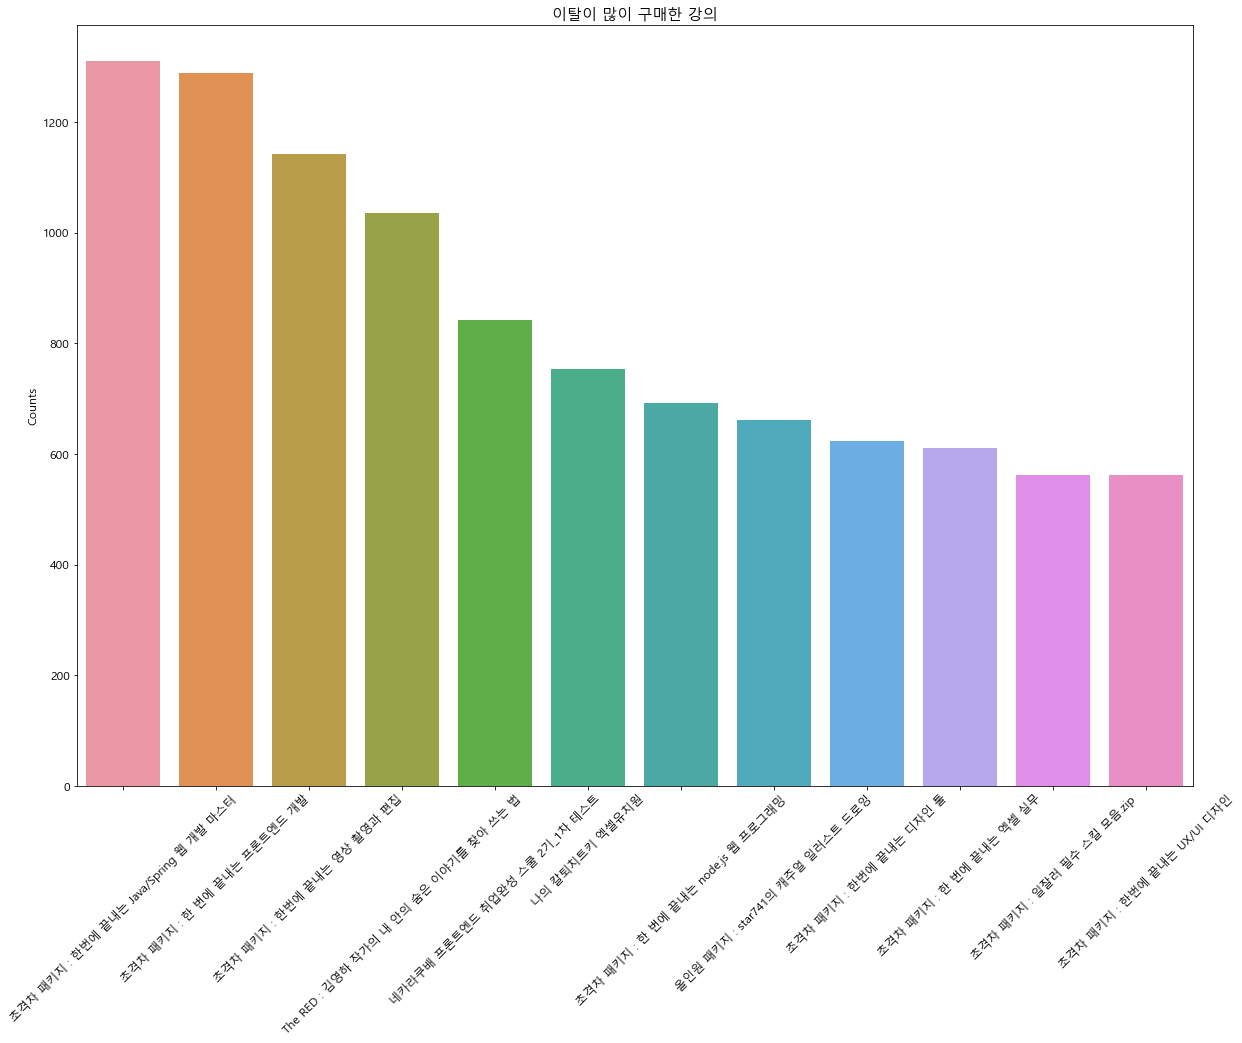

In [ ]:
plt.figure(figsize=(20, 14))
plt.rc('font', size=12)
sns.barplot(x=df[df['group']=='이탈'].course_title.value_counts().head(12).index, y=df[df['group']=='이탈'].course_title.value_counts().head(12))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('이탈이 많이 구매한 강의', fontsize=15,color='black')
plt.show()